In [ ]:
! pip install intersect


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Setup and Functions
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd
from intersect import intersection

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
data_file = pd.read_excel('/content/drive/MyDrive/MMAE419/Fracture_lab/Fracture_BB_F2022.xlsx', sheet_name=None)

for name, sheet in data_file.items():
    sheet['sheet'] = name
    sheet = sheet.rename(columns=lambda x: x.split('\n')[-1])
    sheet = sheet.to_numpy()
    print(f'\nMaterial: {name}')
    #Data
    B = float(sheet[0,1]) #in
    W = float(sheet[1,1]) #in
    Rate = sheet[2,1] #in/min
    Sigma_yield = float(sheet[3,1]) #ksi
    
    a_1 = sheet[0,5]
    a_2 = sheet[1,5]
    a_3 = sheet[2,5]
    a_4 = sheet[3,5]
    a_5 = sheet[4,5]
    

    elongation = sheet[9:,0] #in
    load = sheet[9:,1] #lbf
    
    #Analysis
    a_avg = (a_1 + a_2 + a_3 + a_4 + a_5) / 5; print(f'a_avg = {a_avg:.3f} in')
    a_w = a_avg/W; print(f'a/W = {a_w:.3f}')
    if a_w <= 0.55 and a_w >= 0.45:
      print('a/W: Sample is Good')
    else:
      print('a/W: Sample is NOT Good')

    P_max = max(load); print(f'P_max = {P_max} lbf')
    P_max = max(load); print(f'P_max = {P_max} lbf')
    load_list =list(load)
    P_max_index = load_list.index(P_max)
    P_max_x = elongation[P_max_index]


    f_a_w = (2+a_w)*(0.886+4.64*(a_w)-13.32*((a_w)**2)+14.72*((a_w)**3)-5.6*((a_w)**4))/((1-a_w)**(3/2)); print(f'f(a_w) = {f_a_w:.3f}')

    data_col_names = ['Elongation','Load']
    test_data = pd.read_excel('/content/drive/MyDrive/MMAE419/Fracture_lab/Fracture_BB_F2022.xlsx', sheet_name=name, 
                          skiprows=9, usecols='A:B', names = data_col_names)

    elongation = test_data.Elongation #in
    load = test_data.Load #lbf

    #Polyfits
    polyfit = np.polyfit(elongation[100:250], load[100:250], 1)
    line_x = np.arange(0,np.max(elongation)+0.1,0.001)
    line_y = polyfit[0]*line_x
    polyfit_95_offset = 0.95*polyfit[0]
    line_y_95_offset = polyfit_95_offset*line_x

    x,y = intersection(elongation,load,line_x,line_y_95_offset); print(x); print(y)
    P_5_x = x;
    P_5 = y;
    print(f'P_5 = {P_5}')

    P5_index = np.max(np.where(elongation<x[0]))    
    P5_index = P5_index+1

    PQ_pos = np.max(load[0:P5_index]);
    if PQ_pos <= P_5:
          P_Q = P_5; P_Q_x = P_5_x;
          P_Q_label = 'P_Q = P_5'
          print(f'P_Q = P_5 = {P_Q}')
    else:
          P_Q = PQ_pos
          P_Q_x = elongation[np.max(np.where(load == np.max(load[0:P5_index])))]
          print(f'P_Q = {P_Q}') 

    P_rat = P_max / P_Q
    print(f'P_max/P_Q = {P_rat}')
    if P_rat < 1.10:
      print(f'By P_max/P_Q this is a Valid Test')
    else:
      print(f'By P_max/P_Q this is NOT a Valid Test')

    K_Q = f_a_w * (P_Q / (B * np.sqrt(W)))
    print(f'K_Q = {K_Q}')
    
    if (W-a_avg) > 2.5*(K_Q/Sigma_yield)**2:
      print(f'By (W-a) Standard this is a Valid Test')
    else:
      print(f'By (W-a) Standard this is NOT a Valid Test')

    #Plots
    plt.figure()
    plt.plot(elongation, load, label = 'Collected Data')
    plt.plot(elongation[100:250],load[100:250],'k', label = 'Linear Fit Data')
    plt.plot(line_x, line_y, '--',label = 'Polyfit')
    plt.plot(line_x,line_y_95_offset,'g--', label = '95% Secent offset')
    plt.plot(P_5_x, P_5, 'r.', markersize=15, label = 'P_5')
    plt.plot(P_Q_x, P_Q, 'b.', markersize=15, label = P_Q_label)
    plt.plot(P_max_x, P_max, 'g.', markersize=15, label = 'P_max')
    plt.xlabel('Crack Mouth Opening Displacement (CMOD) [in]')
    plt.ylabel('Load [lbf]')
    plt.legend()
    plt.xlim(0,np.max(elongation)+0.001)
    plt.ylim(0,np.max(load)+500)
    plt.tight_layout()
    plt.show()

NameError: ignored

Material: 1-1018
a_avg = 0.966 in
a/W = 0.484
a/W: Sample is Good
a_1/a_avg = 0.972
a_2/a_avg = 1.023
a_3/a_avg = 1.009
a_4/a_avg = 1.017
a_5/a_avg = 0.980
P_max = 12602.71283 lbf
f(a_w) = 9.195
P_5 = [10181.29985911]
PQ = 10175.15343
P_Q = P_5 = [10181.29985911]


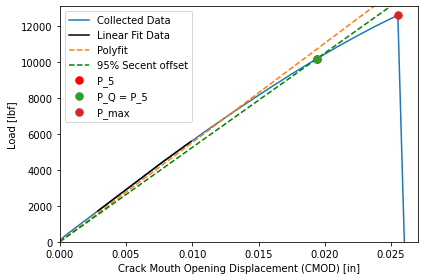

In [ ]:
#TEST
mat = '1-1018'
data = pd.read_excel('/content/drive/MyDrive/Fall2022/MechLab2_419/Lab5-Fracture/Fracture_BB_F2022.xlsx', sheet_name=mat)
print(f'Material: {mat}')

#Data
B = data.iat[0,1] #in
W = float(data.iat[1,1])
Rate = data.iat[2,0] #in/min
Sigma_yield = data.iat[3,0] #ksi

a_1 = data.iat[0,5]
a_2 = data.iat[1,5]
a_3 = data.iat[2,5]
a_4 = data.iat[3,5]
a_5 = data.iat[4,5]

data_col_names = ['Elongation','Load']
test_data = pd.read_excel('/content/drive/MyDrive/Fall2022/MechLab2_419/Lab5-Fracture/Fracture_BB_F2022.xlsx', sheet_name=mat, 
                          skiprows=9, usecols='A:B', names = data_col_names)

elongation = test_data.Elongation #in
load = test_data.Load #lbf

#Analysis
a_avg = (a_1 + a_2 + a_3 + a_4 + a_5) / 5; print(f'a_avg = {a_avg:.3f} in')
a_w = a_avg/W; print(f'a/W = {a_w:.3f}')
if a_w <= 0.55 and a_w >= 0.45:
  print('a/W: Sample is Good')
else:
  print('a/W: Sample is NOT Good')

a_1_avg = a_1/a_avg; print(f'a_1/a_avg = {a_1_avg:.3f}')
a_2_avg = a_2/a_avg; print(f'a_2/a_avg = {a_2_avg:.3f}')
a_3_avg = a_3/a_avg; print(f'a_3/a_avg = {a_3_avg:.3f}')
a_4_avg = a_4/a_avg; print(f'a_4/a_avg = {a_4_avg:.3f}')
a_5_avg = a_5/a_avg; print(f'a_5/a_avg = {a_5_avg:.3f}')

P_max = max(load); print(f'P_max = {P_max} lbf')
load_list =list(load)
P_max_index = load_list.index(P_max)
P_max_x = elongation[P_max_index]

f_a_w = (2+a_w)*(0.886+4.64*(a_w)-13.32*((a_w)**2)+14.72*((a_w)**3)-5.6*((a_w)**4))/((1-a_w)**(3/2)); print(f'f(a_w) = {f_a_w:.3f}')


#Polyfits
polyfit = np.polyfit(elongation[100:250], load[100:250], 1)
line_x = np.arange(0,np.max(elongation)+0.1,0.001)
line_y = polyfit[0]*line_x
polyfit_95_offset = 0.95*polyfit[0]
line_y_95_offset = polyfit_95_offset*line_x

x,y = intersection(elongation,load,line_x,line_y_95_offset);
P_5_x = x;
P_5 = y;
print(f'P_5 = {P_5}')

P5_index = np.max(np.where(elongation<x[0]))    
P5_index = P5_index+1
PQ_pos = np.max(load[0:P5_index]); print(f'PQ = {PQ}')
if PQ_pos <= P_5:
  P_Q = P_5; P_Q_x = P_5_x;
  P_Q_label = 'P_Q = P_5'
  print(f'P_Q = P_5 = {P_Q}')
else:
    P_Q = PQ_pos
    print(f'P_Q = {P_Q}') 


#Plots
plt.figure()
plt.plot(elongation, load, label = 'Collected Data')
plt.plot(elongation[100:250],load[100:250],'k', label = 'Linear Fit Data')
plt.plot(line_x, line_y, '--',label = 'Polyfit')
plt.plot(line_x,line_y_95_offset,'g--', label = '95% Secent offset')
plt.plot(P_5_x, P_5, 'r.', markersize=15, label = 'P_5')
plt.plot(P_Q_x, P_Q, 'b.', markersize=15, label = P_Q_label)
plt.plot(P_max_x, P_max, 'g.', markersize=15, label = 'P_max')
plt.xlabel('Crack Mouth Opening Displacement (CMOD) [in]')
plt.ylabel('Load [lbf]')
plt.legend()
plt.xlim(0,np.max(elongation)+0.001)
plt.ylim(0,np.max(load)+500)
plt.tight_layout()
plt.show()